In [2]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from os import path
#import wordcloud
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer
from sklearn.decomposition import TruncatedSVD
import xgboost as xgb

In [19]:
!pip install wordcloud

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
data = pd.read_csv('C:/Users/expert/Hackathon 2/quora/train.csv')

In [6]:
data.shape

(404290, 6)

In [7]:
data.to_pickle('quora.pkl')

In [4]:
data_copy = data.copy()

In [5]:
data['is_duplicate'].describe()

count    404290.000000
mean          0.369198
std           0.482588
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: is_duplicate, dtype: float64

In [6]:
data['is_duplicate'].value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

In [7]:
df= data.sample(100000)

In [9]:
df.shape

(100000, 6)

Number of training data: 100000
Ratio of duplicate question pairs: 36.880000 %
Total number of questions: 166110
Number of questions appearing multiple times: 19425


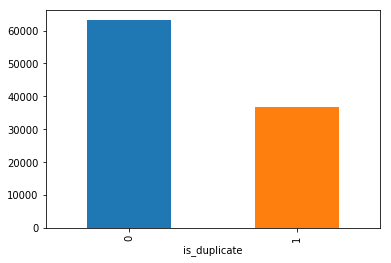

In [12]:
#Look at some statistics of training data
print ("Number of training data: %d" %len(df))
print ("Ratio of duplicate question pairs: %f %%" %round(df['is_duplicate'].mean()*100,2))
qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print ("Total number of questions: %d" %len(np.unique(qids)))
print ("Number of questions appearing multiple times: %d" %np.sum(qids.value_counts()>1))
df.groupby("is_duplicate")['id'].count().plot.bar()

In [48]:
w1 = set(map(lambda word: word.lower().strip(), str(df['question1']).split(" ")))
w2 = set(map(lambda word: word.lower().strip(), str(df['question2']).split(" ")))
w = 

In [14]:
word_share_norm = 1.0 * len(w1 & w2)/(len(w1) + len(w2))

In [15]:
word_share_norm

0.23154362416107382

In [16]:
from nltk.corpus import stopwords
punctuation = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}']
my_stop_words = set(stopwords.words('english')+list(punctuation))

In [46]:
from nltk.stem.lancaster import LancasterStemmer
ls = LancasterStemmer()

In [70]:
#w = [ls.stem(x) for x in w1 w2]

SyntaxError: invalid syntax (<ipython-input-70-75a75b2db16b>, line 1)

In [49]:
w1 = [ls.stem(x) for x in w1]

In [50]:
w2 = [ls.stem(x) for x in w2]

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
tfidf = TfidfVectorizer(stop_words=my_stop_words)

In [71]:
w_filter = tfidf.fit_transform(w1, w2)

In [52]:
w2_filter = tfidf.fit_transform(w2)

In [72]:
w_filter

<303x291 sparse matrix of type '<class 'numpy.float64'>'
	with 300 stored elements in Compressed Sparse Row format>

In [54]:
qu1 = w1_filter.toarray().astype(int)

In [55]:
qu2 = w2_filter.toarray().astype(int)

In [73]:
que = w_filter.toarray().astype(int)

In [74]:
len(que)

303

In [59]:
df_que1= pd.DataFrame(qu1)
df_que2= pd.DataFrame(qu2)

In [62]:
df_que2.shape

(293, 283)

In [63]:
df_que1.shape

(303, 291)

In [64]:
df_que1.head()

,0,1,2,3,4,5,6,7,8,9,...,281,282,283,284,285,286,287,288,289,290
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df_que2.head()

,0,1,2,3,4,5,6,7,8,9,...,273,274,275,276,277,278,279,280,281,282
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
df_que = pd.DataFrame(que)

In [76]:
df_que.head()

,0,1,2,3,4,5,6,7,8,9,...,281,282,283,284,285,286,287,288,289,290
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
df_que.shape

(303, 291)

In [ ]:
data